# Portfolio analysis

In [284]:
library('dplyr')
library('tidyverse')
library("fitdistrplus")
library('quadprog')
library('ggplot2')
options(repr.plot.width=16, repr.plot.height=16)

In [266]:
source('./PortfolioFunctions_v1.r')

In [267]:
#* Reading datasets
down <- read.csv('./df_down_1990.csv')%>%
  mutate(Date=as.Date(Date,format = "%Y-%m-%d")) 

ftse100 <- read.csv('./df_FTSE100.csv')%>%
  mutate(Date=as.Date(Date,format = "%d/%m/%Y"))

ipc <- read.csv('./df_IPC_MX.csv')%>%
  mutate(Date=as.Date(Date,format = "%Y-%m-%d")) 

nasdaq <- read.csv('./df_NASDAQ.csv')%>%
  mutate(Date=as.Date(Date,format = "%Y-%m-%d")) 

In [268]:
top_vect <- 6:10
df_completed <- list('down' = down, 'ftse100' = ftse100, 'ipc' = ipc, 'nasdaq' = nasdaq)
years_start <- c('2000', '2013', '2013', '2013')

for(j in 1:length(df_completed)){
  if(j == 1){
    for(i in 1:length(top_vect)){
      if(i == 1){
        # get portfolio
        port.mv <- getPortfolio(base = df_completed[[j]], 
                                year_to_start = years_start[j], 
                                rebalance_period = 24, 
                                mod = 'mv', top.k = top_vect[i])
        port.mv_gbm <- getPortfolio(base = df_completed[[j]], 
                                    year_to_start = years_start[j], 
                                    rebalance_period = 24, 
                                    mod = 'gbm', top.k = top_vect[i])
        
        # Portfolio returns
        names <- c('date', 'base', 'top', 'MV', 'MV-GBM', 'MV-EW', 'MV-RW')
        portfolio.ret <- data.frame('date' = port.mv$df.port.ret$date,
                                    'base' = names(df_completed)[j],
                                    'top' = top_vect[i],
                                    'MV'= port.mv$df.port.ret$min.ret,
                                    'MV.GBM'= port.mv_gbm$df.port.ret$min.ret,
                                    'MV.EW' = port.mv$df.port.ret$eqw.ret,
                                    'MV.RW' = port.mv$df.port.ret$ran.ret)
        # Cummulative returns
        port.cum.ret <- portfolio.ret %>%
          mutate(cum.MV = cumsum(MV),
                 cum.MV.GBM = cumsum(MV.GBM),
                 cum.MV.EW = cumsum(MV.EW),
                 cum.MV.RW = cumsum(MV.RW)) %>%
          dplyr::select(-MV,-MV.GBM,-MV.EW,-MV.RW)
        ## colnames
        colnames(portfolio.ret) <- names
        colnames(port.cum.ret) <- names     
      }else{
        # get portfolio
        port.mv <- getPortfolio(base = df_completed[[j]], 
                                year_to_start = years_start[j], 
                                rebalance_period = 24, 
                                mod = 'mv', top.k = top_vect[i])
        port.mv_gbm <- getPortfolio(base = df_completed[[j]], 
                                    year_to_start = years_start[j], 
                                    rebalance_period = 24, 
                                    mod = 'gbm', top.k = top_vect[i])
        
        # Portfolio returns
        names <- c('date', 'base', 'top', 'MV', 'MV-GBM', 'MV-EW', 'MV-RW')
        portfolio.ret_i <- data.frame('date' = port.mv$df.port.ret$date,
                                      'base' = names(df_completed)[j],
                                      'top' = top_vect[i],
                                      'MV'= port.mv$df.port.ret$min.ret,
                                      'MV.GBM'= port.mv_gbm$df.port.ret$min.ret,
                                      'MV.EW' = port.mv$df.port.ret$eqw.ret,
                                      'MV.RW' = port.mv$df.port.ret$ran.ret) 
        # Cummulative returns
        port.cum.ret_i <- portfolio.ret_i %>%
          mutate(cum.MV = cumsum(MV),
                 cum.MV.GBM = cumsum(MV.GBM),
                 cum.MV.EW = cumsum(MV.EW),
                 cum.MV.RW = cumsum(MV.RW)) %>%
          dplyr::select(-MV,-MV.GBM,-MV.EW,-MV.RW)
        ## colnames
        colnames(portfolio.ret_i) <- names
        colnames(port.cum.ret_i) <- names
          
        # join tables
        portfolio.ret <- rbind(portfolio.ret, portfolio.ret_i)
        port.cum.ret <- rbind(port.cum.ret, port.cum.ret_i)
      } 
      
    } 
    port.ret.total <- portfolio.ret
    port.cum.ret.total <- port.cum.ret 
      
  }else{
    for(i in 1:length(top_vect)){
      if(i == 1){
        # get portfolio
        port.mv <- getPortfolio(base = df_completed[[j]], 
                                year_to_start = years_start[j], 
                                rebalance_period = 24, 
                                mod = 'mv', top.k = top_vect[i])
        port.mv_gbm <- getPortfolio(base = df_completed[[j]], 
                                    year_to_start = years_start[j], 
                                    rebalance_period = 24, 
                                    mod = 'gbm', top.k = top_vect[i])
        
        # Portfolio returns
        names <- c('date', 'base', 'top', 'MV', 'MV-GBM', 'MV-EW', 'MV-RW')
        portfolio.ret_1 <- data.frame('date' = port.mv$df.port.ret$date,
                                    'base' = names(df_completed)[j],
                                    'top' = top_vect[i],
                                    'MV'= port.mv$df.port.ret$min.ret,
                                    'MV.GBM'= port.mv_gbm$df.port.ret$min.ret,
                                    'MV.EW' = port.mv$df.port.ret$eqw.ret,
                                    'MV.RW' = port.mv$df.port.ret$ran.ret)
        # Cummulative returns
        port.cum.ret_1 <- portfolio.ret_1 %>%
          mutate(cum.MV = cumsum(MV),
                 cum.MV.GBM = cumsum(MV.GBM),
                 cum.MV.EW = cumsum(MV.EW),
                 cum.MV.RW = cumsum(MV.RW)) %>%
          dplyr::select(-MV,-MV.GBM,-MV.EW,-MV.RW)
        ## colnames
        colnames(portfolio.ret_1) <- names
        colnames(port.cum.ret_1) <- names
      }else{
        # get portfolio
        port.mv <- getPortfolio(base = df_completed[[j]], 
                                year_to_start = years_start[j], 
                                rebalance_period = 24, 
                                mod = 'mv', top.k = top_vect[i])
        port.mv_gbm <- getPortfolio(base = df_completed[[j]], 
                                    year_to_start = years_start[j], 
                                    rebalance_period = 24, 
                                    mod = 'gbm', top.k = top_vect[i])
        
        # Portfolio return
        names <- c('date', 'base', 'top', 'MV', 'MV-GBM', 'MV-EW', 'MV-RW')
        portfolio.ret_i <- data.frame('date' = port.mv$df.port.ret$date,
                                      'base' = names(df_completed)[j],
                                      'top' = top_vect[i],
                                      'MV'= port.mv$df.port.ret$min.ret,
                                      'MV.GBM'= port.mv_gbm$df.port.ret$min.ret,
                                      'MV.EW' = port.mv$df.port.ret$eqw.ret,
                                      'MV.RW' = port.mv$df.port.ret$ran.ret) 
        # Cummulative returns
        port.cum.ret_i <- portfolio.ret_i %>%
          mutate(cum.MV = cumsum(MV),
                 cum.MV.GBM = cumsum(MV.GBM),
                 cum.MV.EW = cumsum(MV.EW),
                 cum.MV.RW = cumsum(MV.RW)) %>%
          dplyr::select(-MV,-MV.GBM,-MV.EW,-MV.RW)
        ## colnames
        colnames(portfolio.ret_i) <- names
        colnames(port.cum.ret_i) <- names
        
        # join tables
        portfolio.ret_1 <- rbind(portfolio.ret_1, portfolio.ret_i)
        port.cum.ret_1 <- rbind(port.cum.ret_1, port.cum.ret_i)
      }
     
    }
     port.ret.total <- rbind(port.ret.total,  portfolio.ret_1)
     port.cum.ret.total <- rbind(port.cum.ret.total, port.cum.ret_1)
  }
   
}

Estimated period : 2000-01 
Estimated period : 2002-01 
Estimated period : 2004-01 
Estimated period : 2006-01 
Estimated period : 2008-01 
Estimated period : 2010-01 
Estimated period : 2012-01 
Estimated period : 2014-01 
Estimated period : 2016-01 
Estimated period : 2018-01 
Estimated period : 2020-01 
Estimated period : 2000-01 
Estimated period : 2002-01 
Estimated period : 2004-01 
Estimated period : 2006-01 
Estimated period : 2008-01 
Estimated period : 2010-01 
Estimated period : 2012-01 
Estimated period : 2014-01 
Estimated period : 2016-01 
Estimated period : 2018-01 
Estimated period : 2020-01 
Estimated period : 2000-01 
Estimated period : 2002-01 
Estimated period : 2004-01 
Estimated period : 2006-01 
Estimated period : 2008-01 
Estimated period : 2010-01 
Estimated period : 2012-01 
Estimated period : 2014-01 
Estimated period : 2016-01 
Estimated period : 2018-01 
Estimated period : 2020-01 
Estimated period : 2000-01 
Estimated period : 2002-01 
Estimated period : 2

In [269]:
base.ret <- port.ret.total %>%
  gather(key='Modelo',value='portfolio.return',-date,-top,-base) 
# summary of global Sharpe ratio
mean_port <- base.ret %>% 
  group_by(base,top,Modelo) %>% 
  summarize(mean=mean(portfolio.return),
            sd = sd(portfolio.return),
            sr = mean/sd) %>%
  ungroup() %>%
  data.frame() %>% 
arrange(base,top,desc(sr),group_by = Modelo)

In [292]:
mean_port 

base,top,Modelo,mean,sd,sr
<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>
down,6,MV-EW,0.0010424256,0.05133150,0.020307715
down,6,MV-GBM,0.0009482092,0.05078816,0.018669886
down,6,MV,0.0009270819,0.04981196,0.018611631
down,6,MV-RW,0.0008646976,0.05413317,0.015973527
down,7,MV-EW,0.0008935076,0.04399843,0.020307715
down,7,MV-GBM,0.0008786953,0.04364305,0.020133683
down,7,MV,0.0008358916,0.04153775,0.020123658
down,7,MV-RW,0.0005261397,0.04643923,0.011329637
down,8,MV-GBM,0.0009129432,0.03892662,0.023452928


In [271]:
Sharpe_ratio_tab <- mean_port %>% 
dplyr::select(-mean,-sd) %>% 
mutate(Modelo = ifelse(Modelo == 'MV-EW', 'MV_EW', 
                       ifelse(Modelo == 'MV-GBM','MV_GBM',
                              ifelse(Modelo == 'MV-RW', 'MV_RW','MV')))) %>%
spread(Modelo,sr) %>%
mutate('Best' = ifelse(MV > MV_EW & MV > MV_GBM & MV > MV_RW,'MV',
                       ifelse(MV_EW > MV & MV_EW > MV_GBM & MV_EW > MV_RW, 'MV_EW', 
                              ifelse(MV_RW > MV & MV_RW > MV_GBM & MV_RW > MV_EW, 'MV_RW','MV_GBM'))))


In [295]:
# cummulative return (reached)
final_cum_ret <- port.cum.ret.total %>% 
gather(key='Modelo', value = 'cum.ret',-date,-base,-top)  %>%
mutate(Modelo = ifelse(Modelo == 'MV-EW', 'MV_EW', 
                       ifelse(Modelo == 'MV-GBM','MV_GBM',
                              ifelse(Modelo == 'MV-RW', 'MV_RW','MV')))) %>%
filter(date == '2020-12-31') %>%
spread(Modelo,cum.ret) %>%
dplyr::select(-date)
final_cum_ret

base,top,MV,MV_EW,MV_GBM,MV_RW
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
down,6,4.8882101,5.5025732,4.9946050,4.5467492
down,7,4.3734273,4.7164913,4.6593978,2.6822169
down,8,3.7689137,4.1269299,4.8743743,4.3287451
down,9,3.0396400,3.6683822,3.9373646,3.5462013
down,10,2.8537208,3.3015439,4.1018825,4.3886374
ftse100,6,0.7055409,1.7281163,0.6697876,2.8877554
ftse100,7,1.5994426,1.4812425,1.7885845,1.5382557
ftse100,8,0.7670855,1.2960872,0.9043477,1.1820624
ftse100,9,1.0387300,1.1520775,1.2258574,1.0808152


## Sharpe ratio by Index and number of stocks selected

In [297]:
merged_tab <- merge(Sharpe_ratio_tab, final_cum_ret, by=c('base','top')) %>%
arrange(base, top) %>%
mutate('Cum_ret' = ifelse(Best == 'MV_RW', MV_RW.y,
                                  ifelse(Best == 'MV_GBM', MV_GBM.y,
                                         ifelse(Best == 'MV_EW', MV_EW.y, MV.y)))) %>%
dplyr::select(-MV.y, -MV_EW.y, -MV_GBM.y, -MV_RW.y) %>%
mutate('Sharpe_ratio' = ifelse(Best == 'MV_RW', MV_RW.x,
                               ifelse(Best == 'MV_GBM', MV_GBM.x,
                                      ifelse(Best == 'MV_EW', MV_EW.x, MV.x)))) %>%
dplyr::select(-MV.x, -MV_EW.x, -MV_GBM.x, -MV_RW.x) %>%
dplyr::select(base, top, Best, Sharpe_ratio, Cum_ret)


merged_tab

base,top,Best,Sharpe_ratio,Cum_ret
<chr>,<int>,<chr>,<dbl>,<dbl>
down,6,MV_EW,0.020307715,5.5025732
down,7,MV_EW,0.020307715,4.7164913
down,8,MV_GBM,0.023452928,4.8743743
down,9,MV_GBM,0.021866108,3.9373646
down,10,MV_GBM,0.024068238,4.1018825
ftse100,6,MV_RW,0.030224474,2.8877554
ftse100,7,MV_GBM,0.028481367,1.7885845
ftse100,8,MV_EW,0.022858593,1.2960872
ftse100,9,MV_EW,0.022858593,1.1520775


In [299]:
#saveRDS(port.ret.total, file = "./port.ret.total.RData")
#saveRDS(port.cum.ret.total, file = "./port.cum.ret.total.RData")

# Plots of Cumulative returns 

In [277]:
# base plot cum.ret
base.cum.ret <- port.cum.ret.total %>%
  gather(key='Modelo',value='cumulative.return',-date,-base,-top)

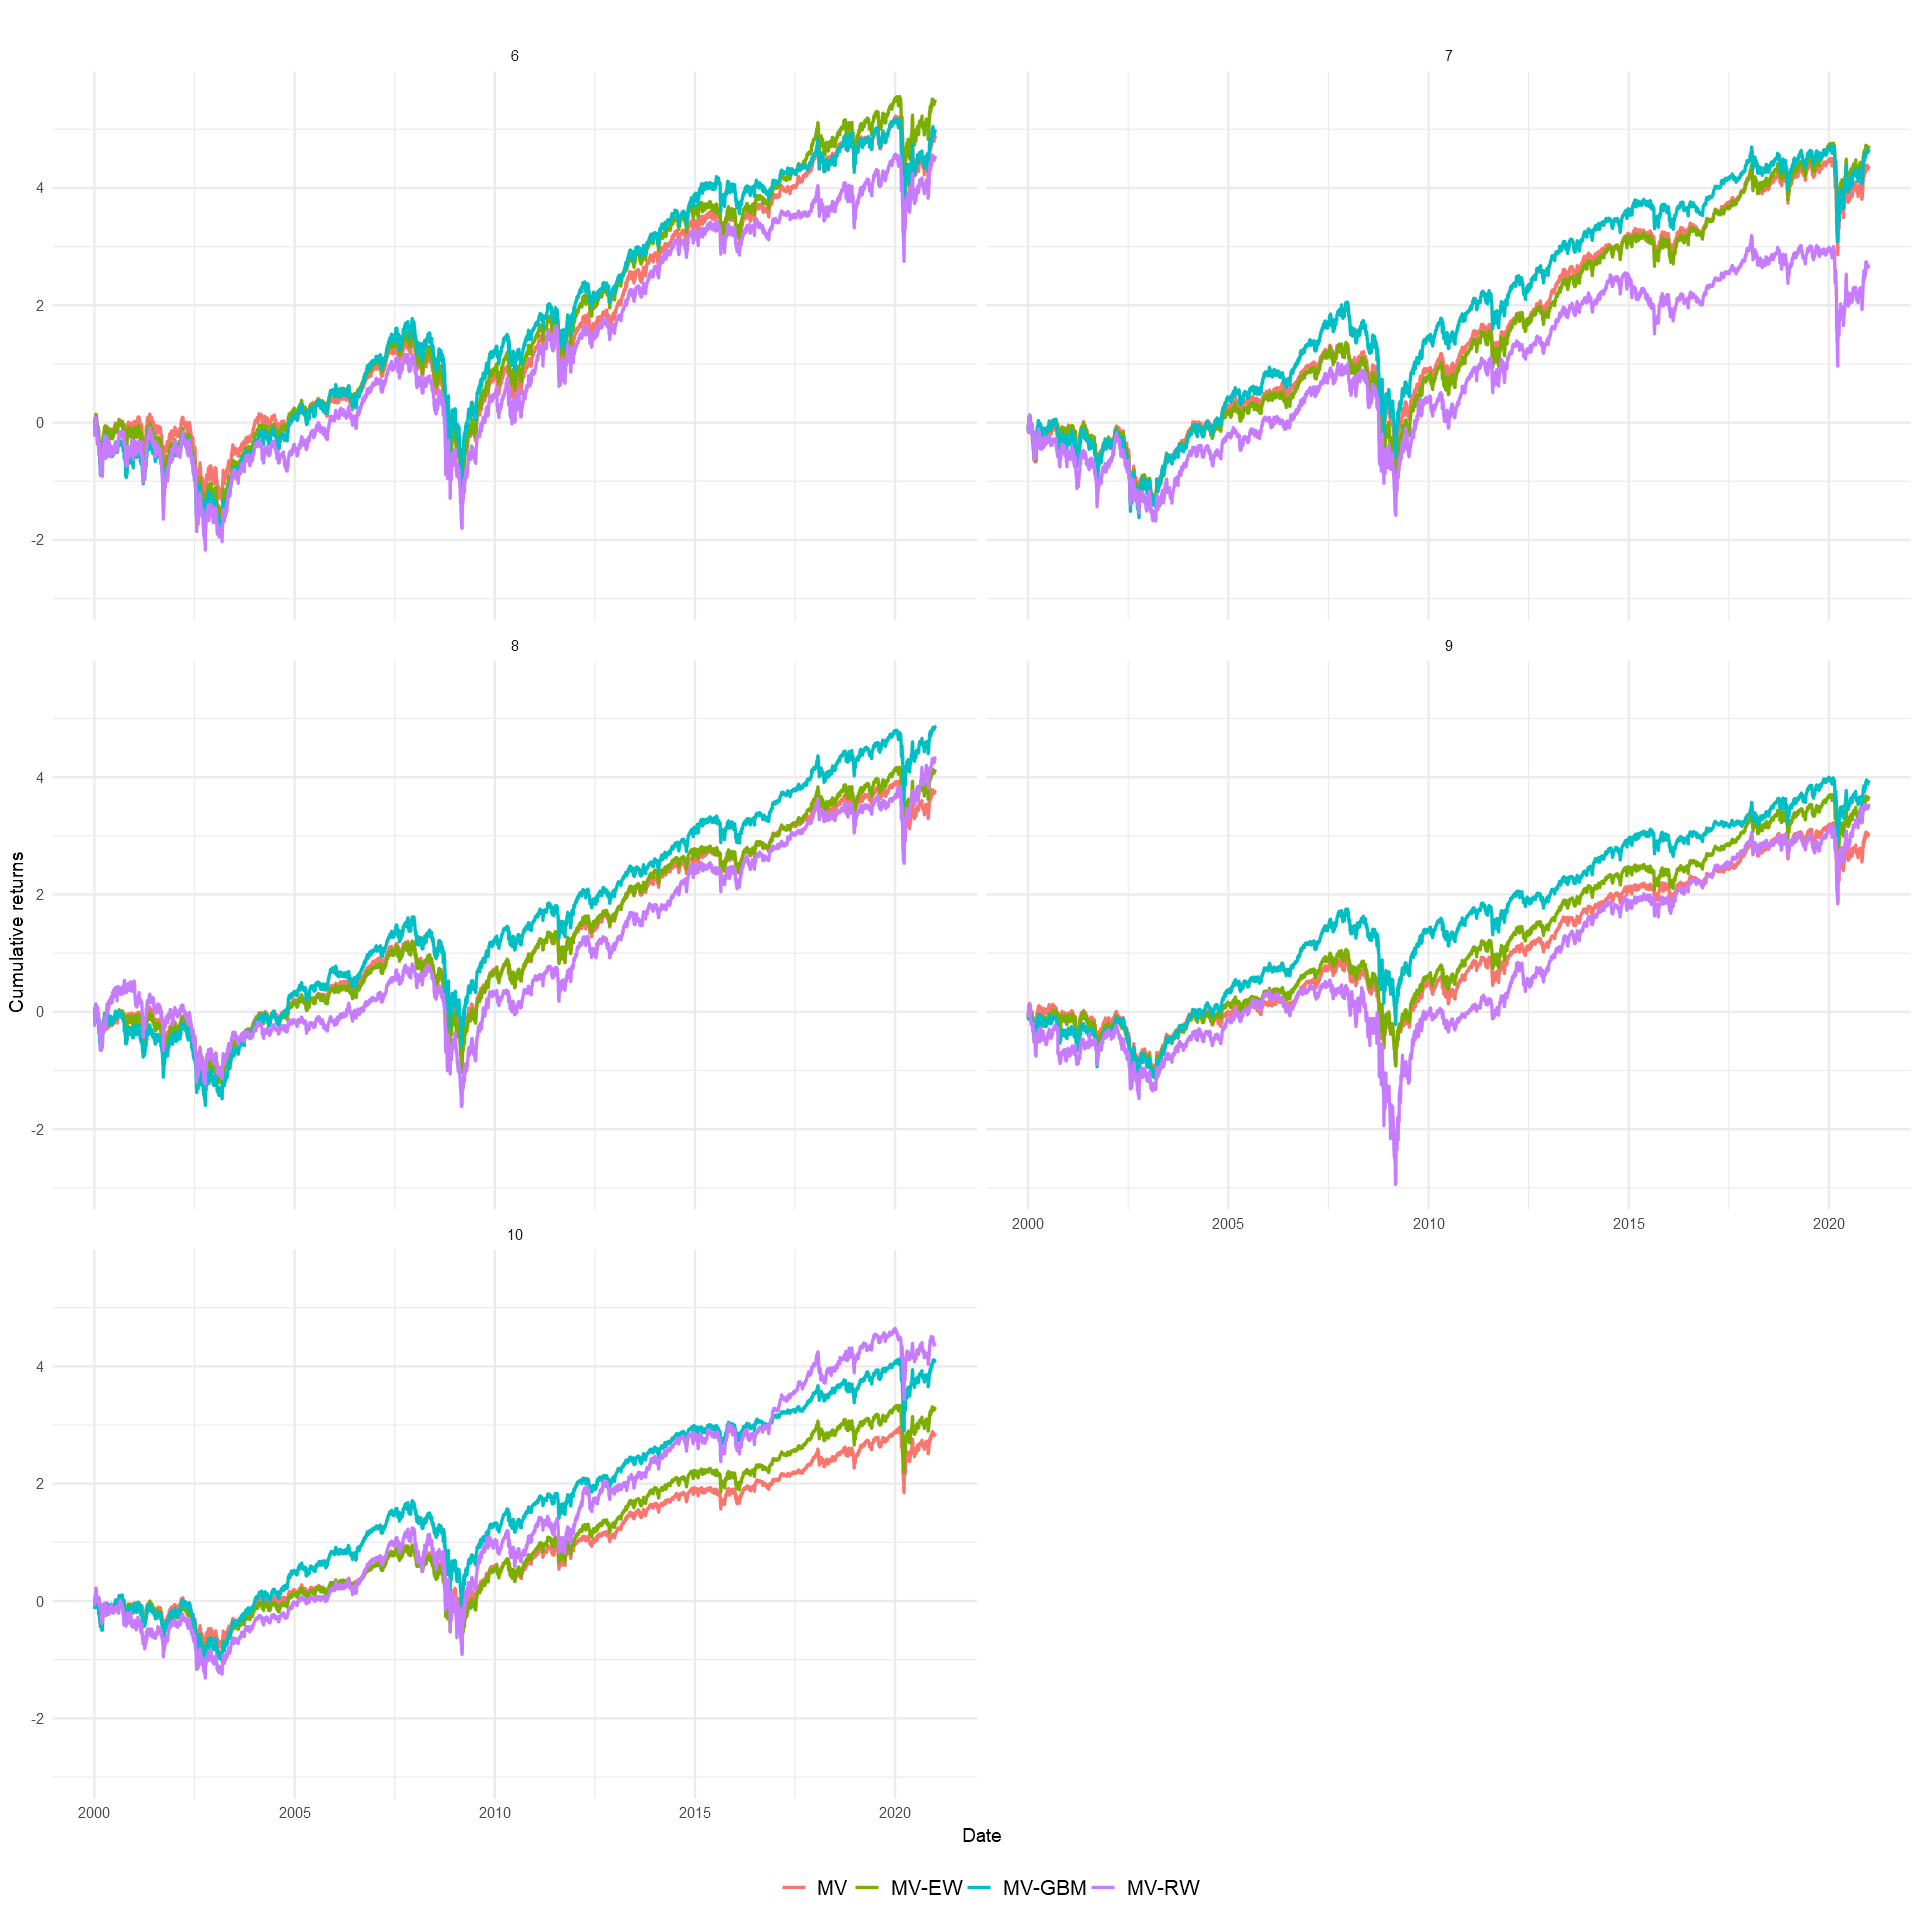

In [285]:
# Down Jones index
p0 <- ggplot(base.cum.ret%>%filter(base == 'down', date <= '2021-01-01') , aes(x=date,y=cumulative.return,col=Modelo) )+
  geom_line(size=0.7) +
  theme_minimal() +
  theme(legend.position="bottom",
        legend.title = element_blank(),
        legend.text = element_text(colour="black", size=12)) +
  labs(title="",x='Date',y='Cumulative returns') +
  facet_wrap(vars(top),ncol = 2) 
p0

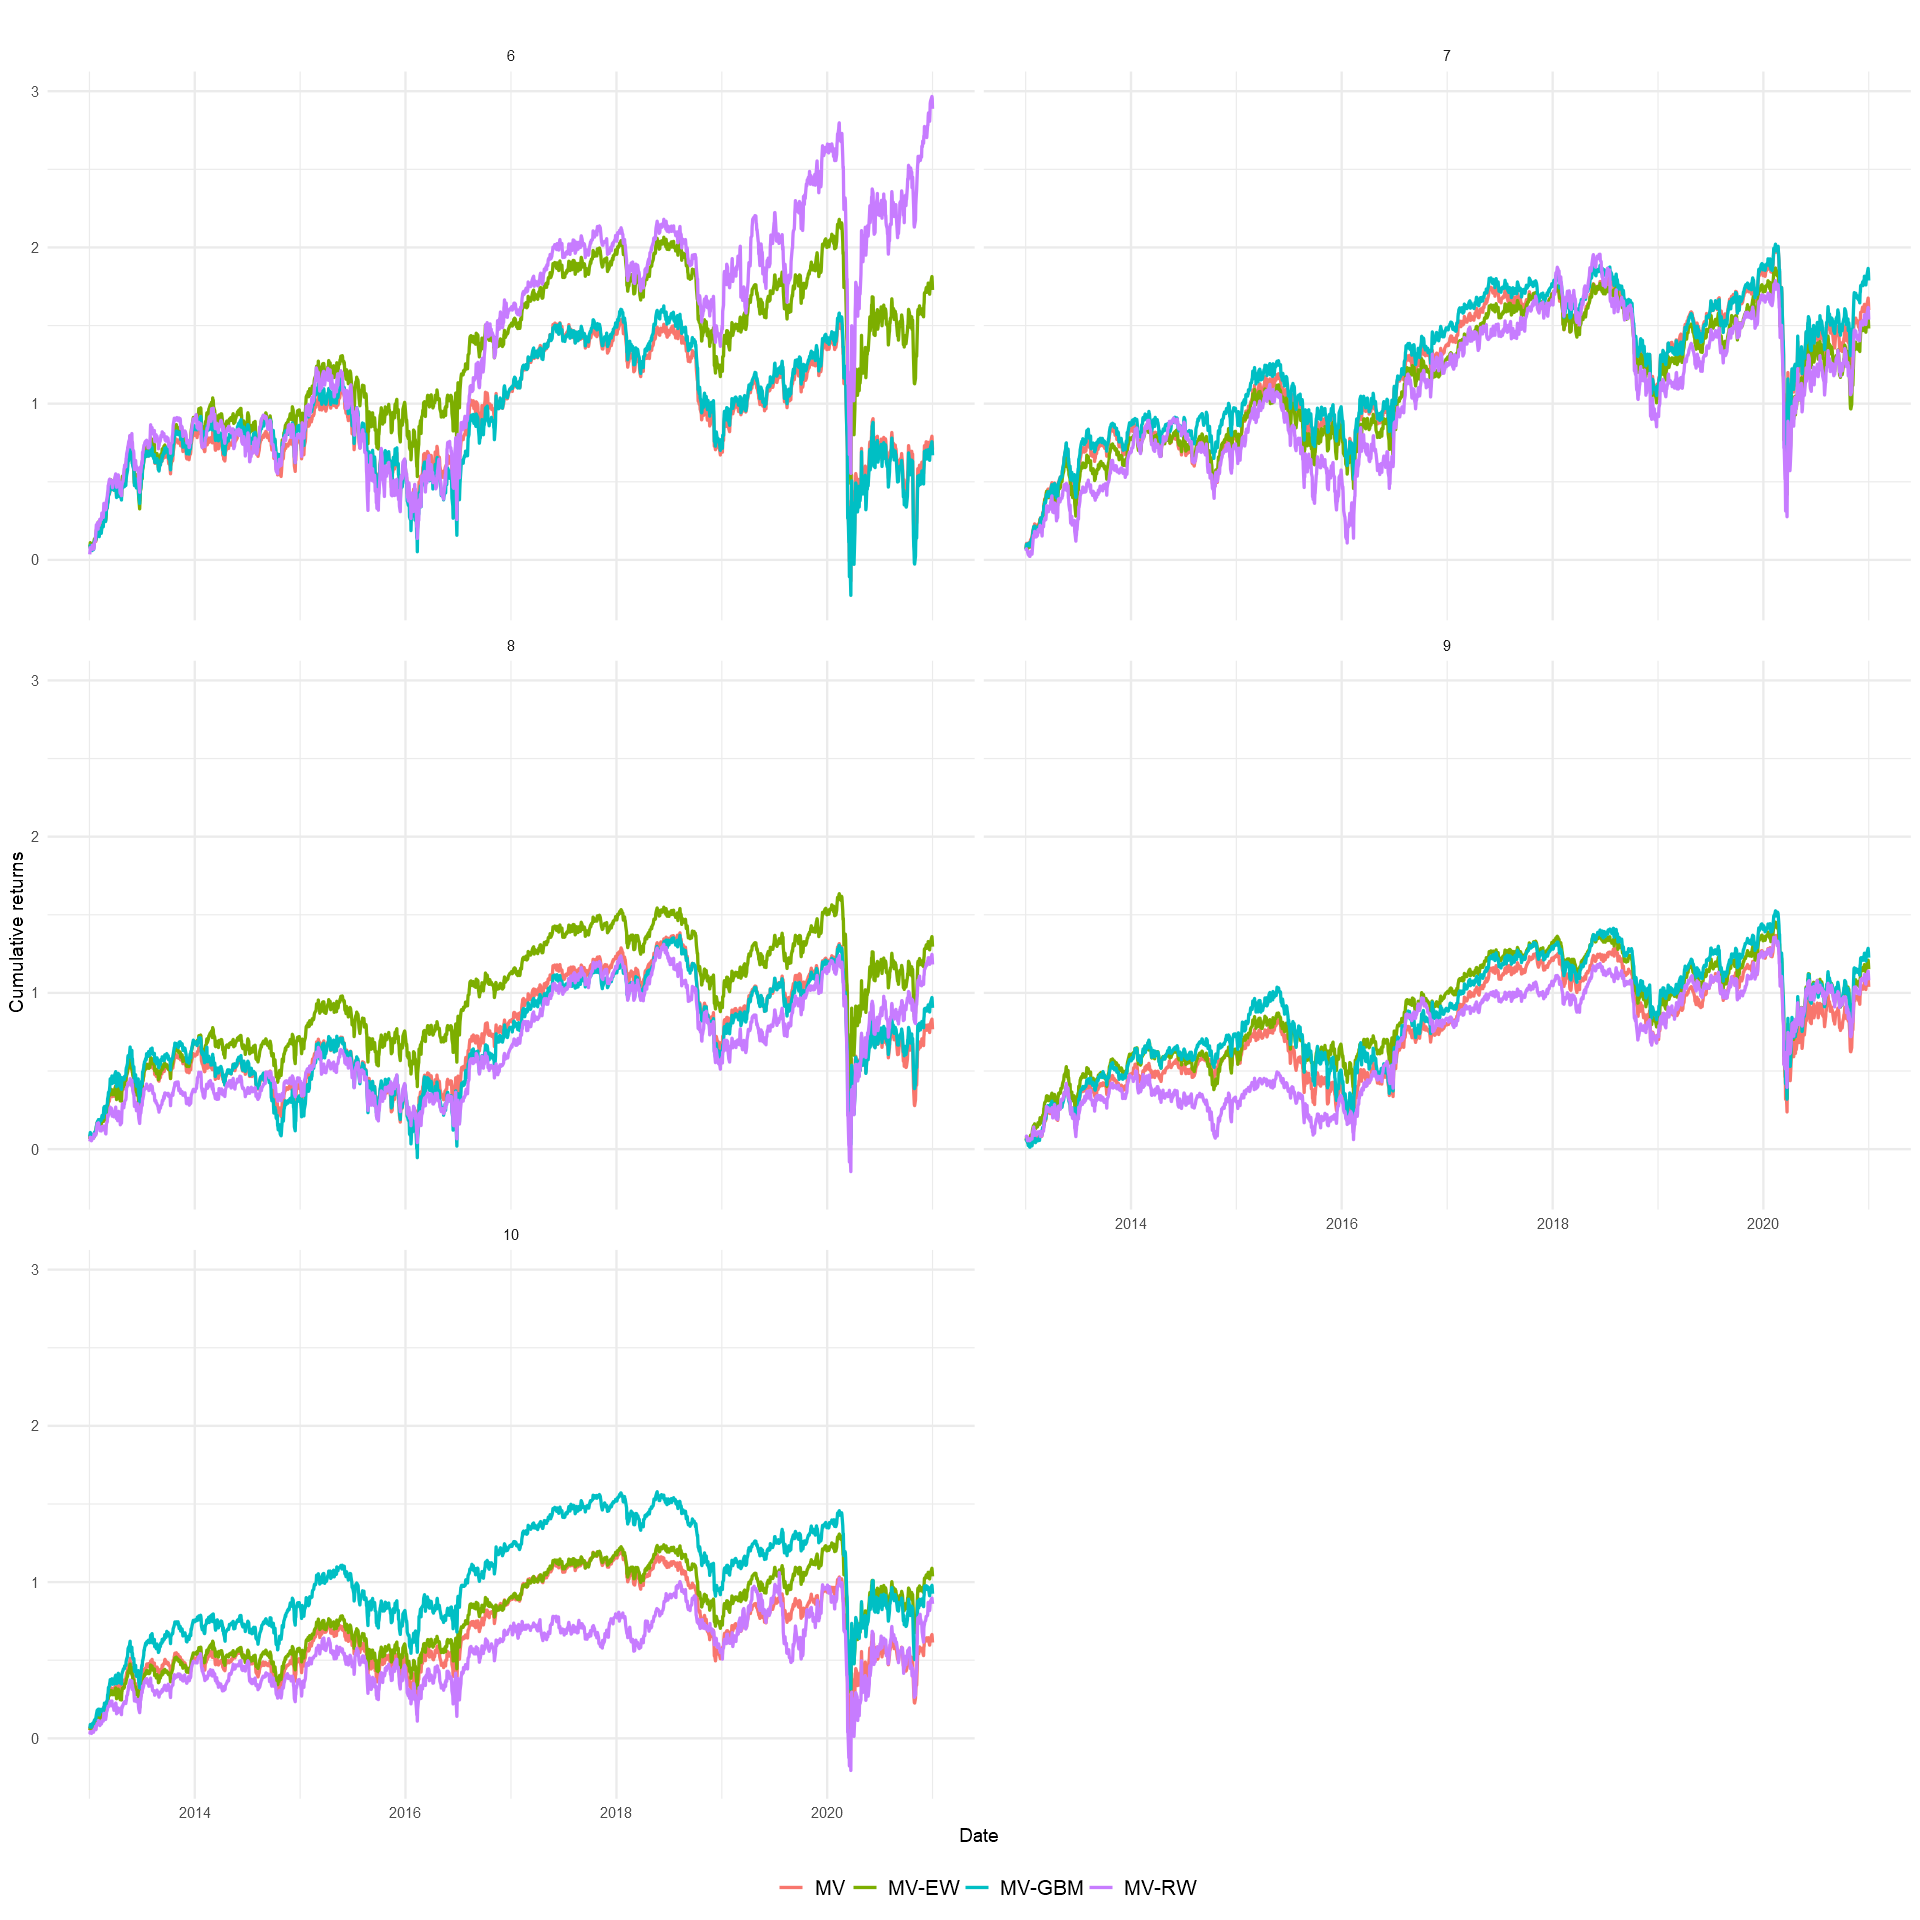

In [287]:
# FTSE 100 index
p1 <- ggplot(base.cum.ret%>%filter(base == 'ftse100', date <= '2021-01-01') , aes(x=date,y=cumulative.return,col=Modelo) )+
  geom_line(size=0.7) +
  theme_minimal() +
  theme(legend.position="bottom",
        legend.title = element_blank(),
        legend.text = element_text(colour="black", size=12)) +
  labs(title="",x='Date',y='Cumulative returns') +
  facet_wrap(vars(top), ncol=2) 
p1

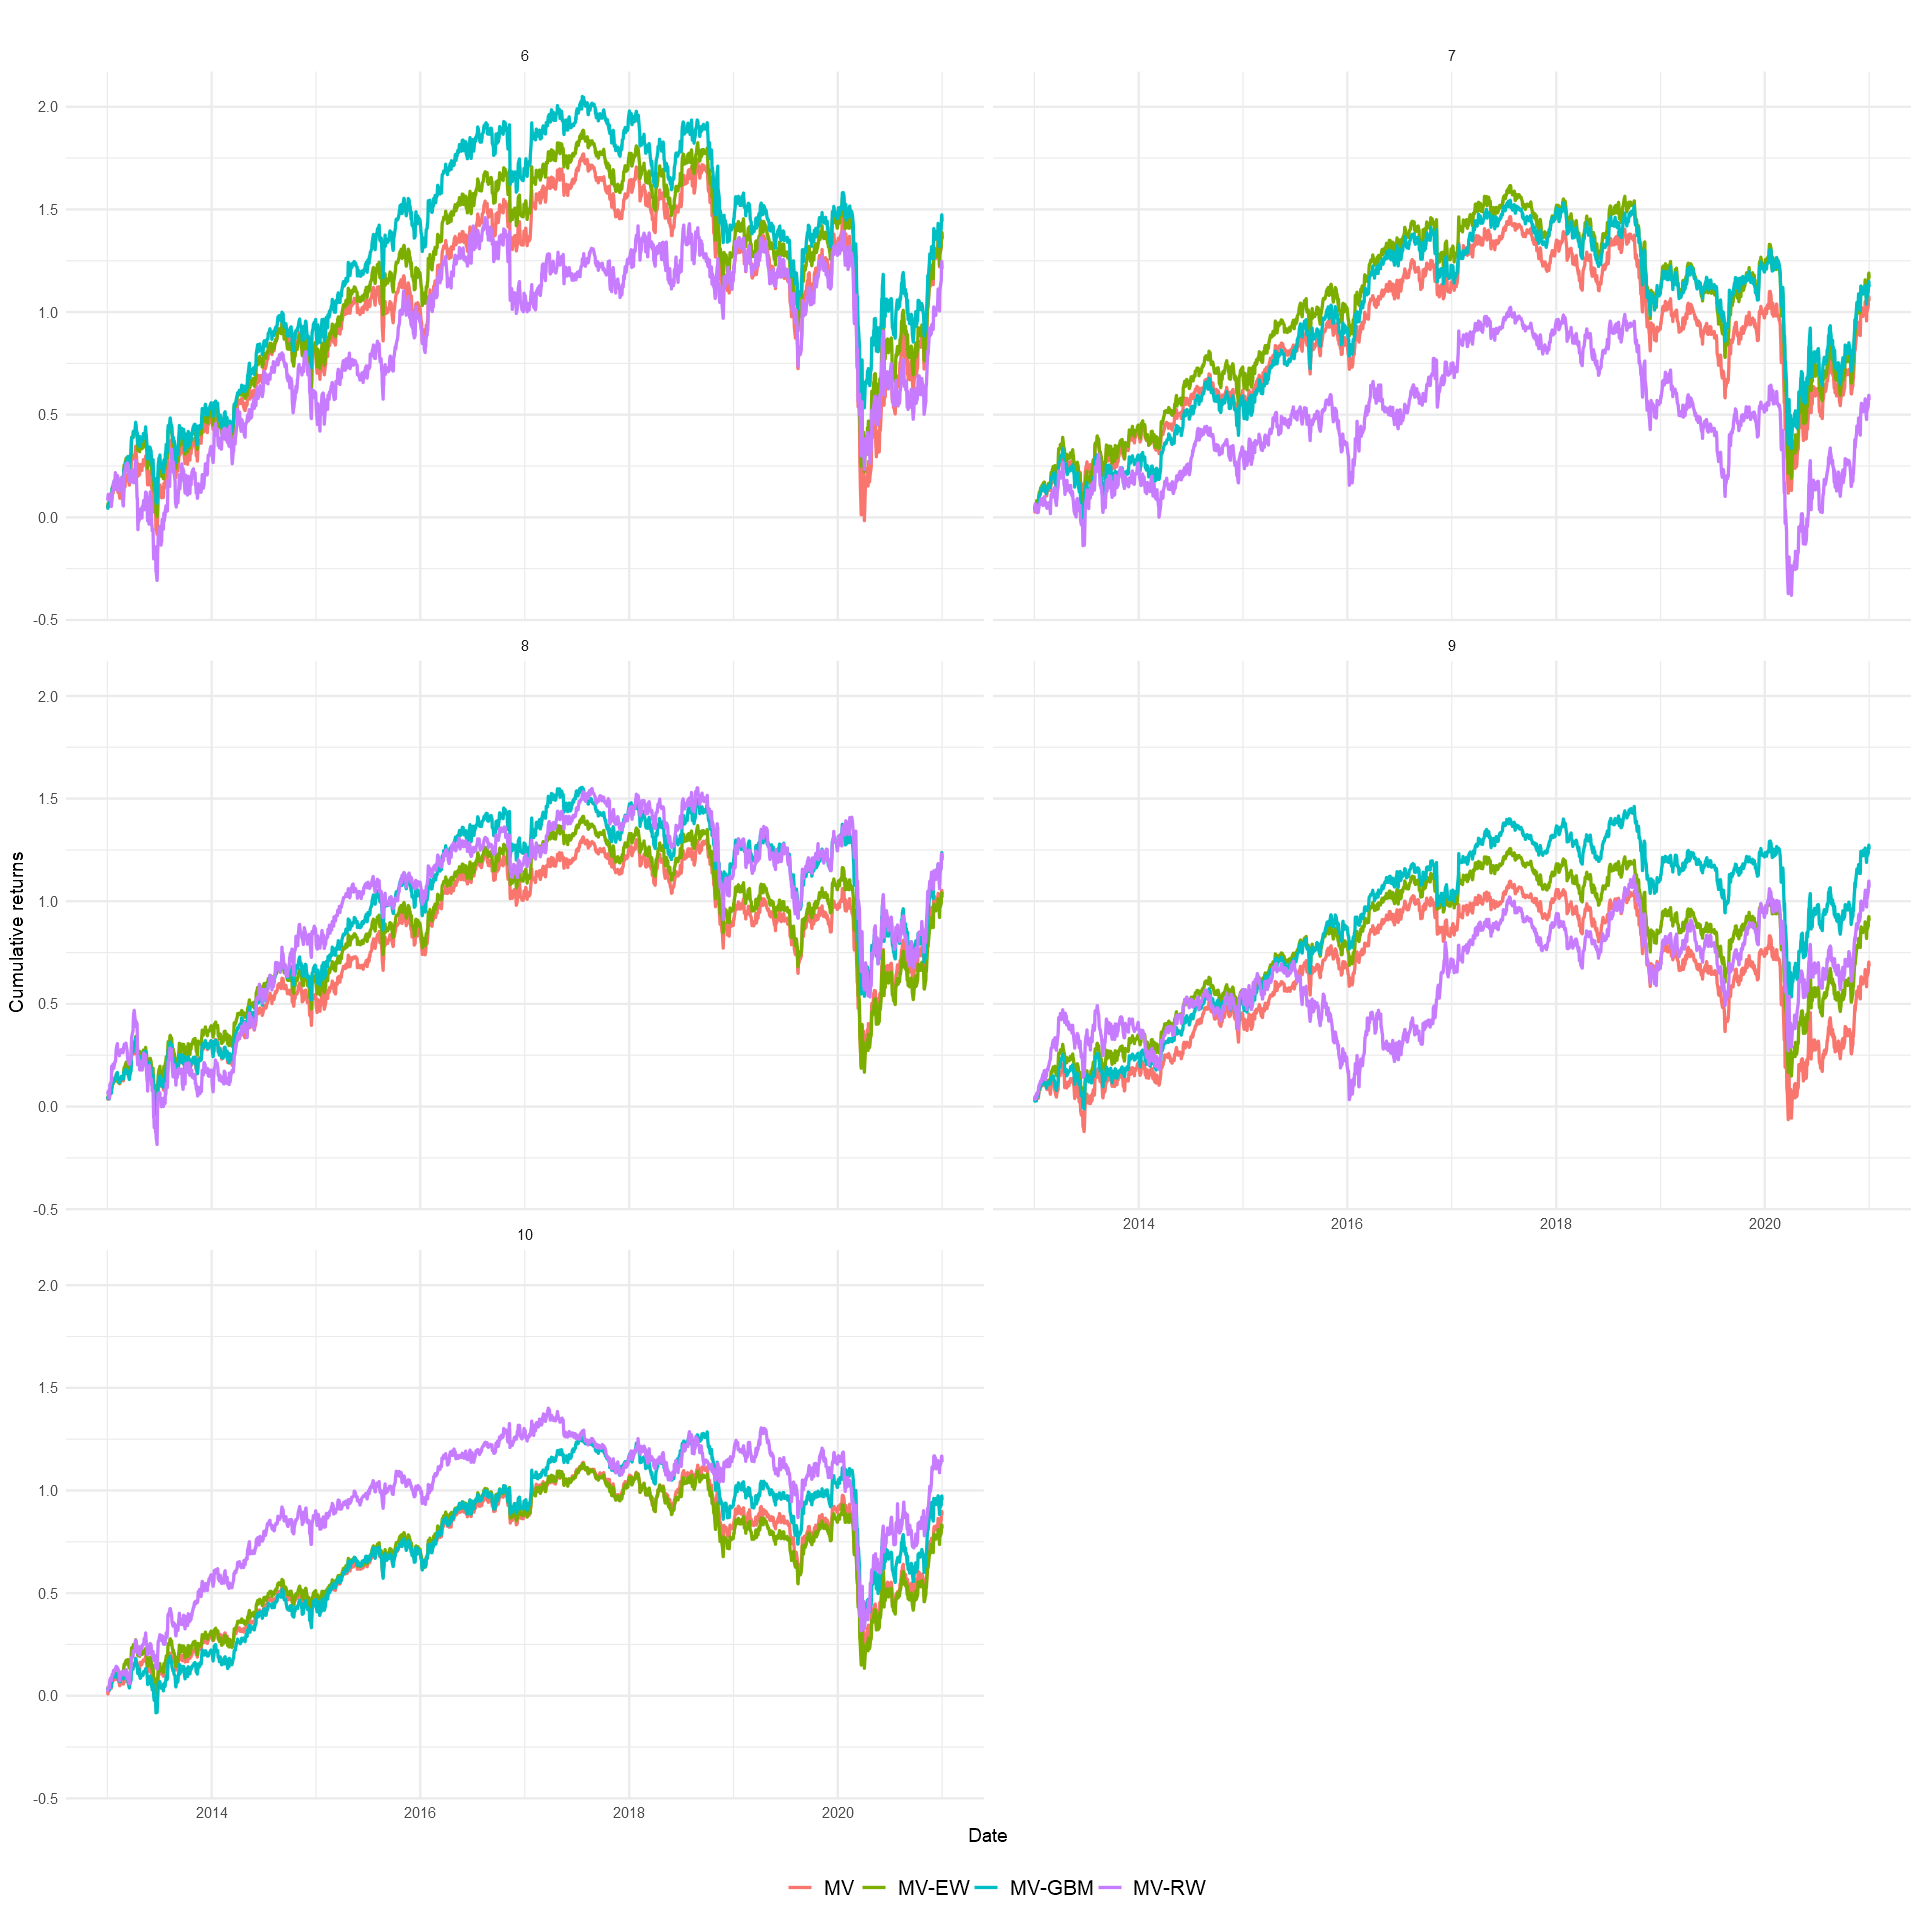

In [288]:
# IPC index
p2 <- ggplot(base.cum.ret%>%filter(base == 'ipc', date <= '2021-01-01') , aes(x=date,y=cumulative.return,col=Modelo) )+
  geom_line(size=0.7) +
  theme_minimal() +
  theme(legend.position="bottom",
        legend.title = element_blank(),
        legend.text = element_text(colour="black", size=12)) +
  labs(title="",x='Date',y='Cumulative returns') +
  facet_wrap(vars(top), ncol=2) 
p2

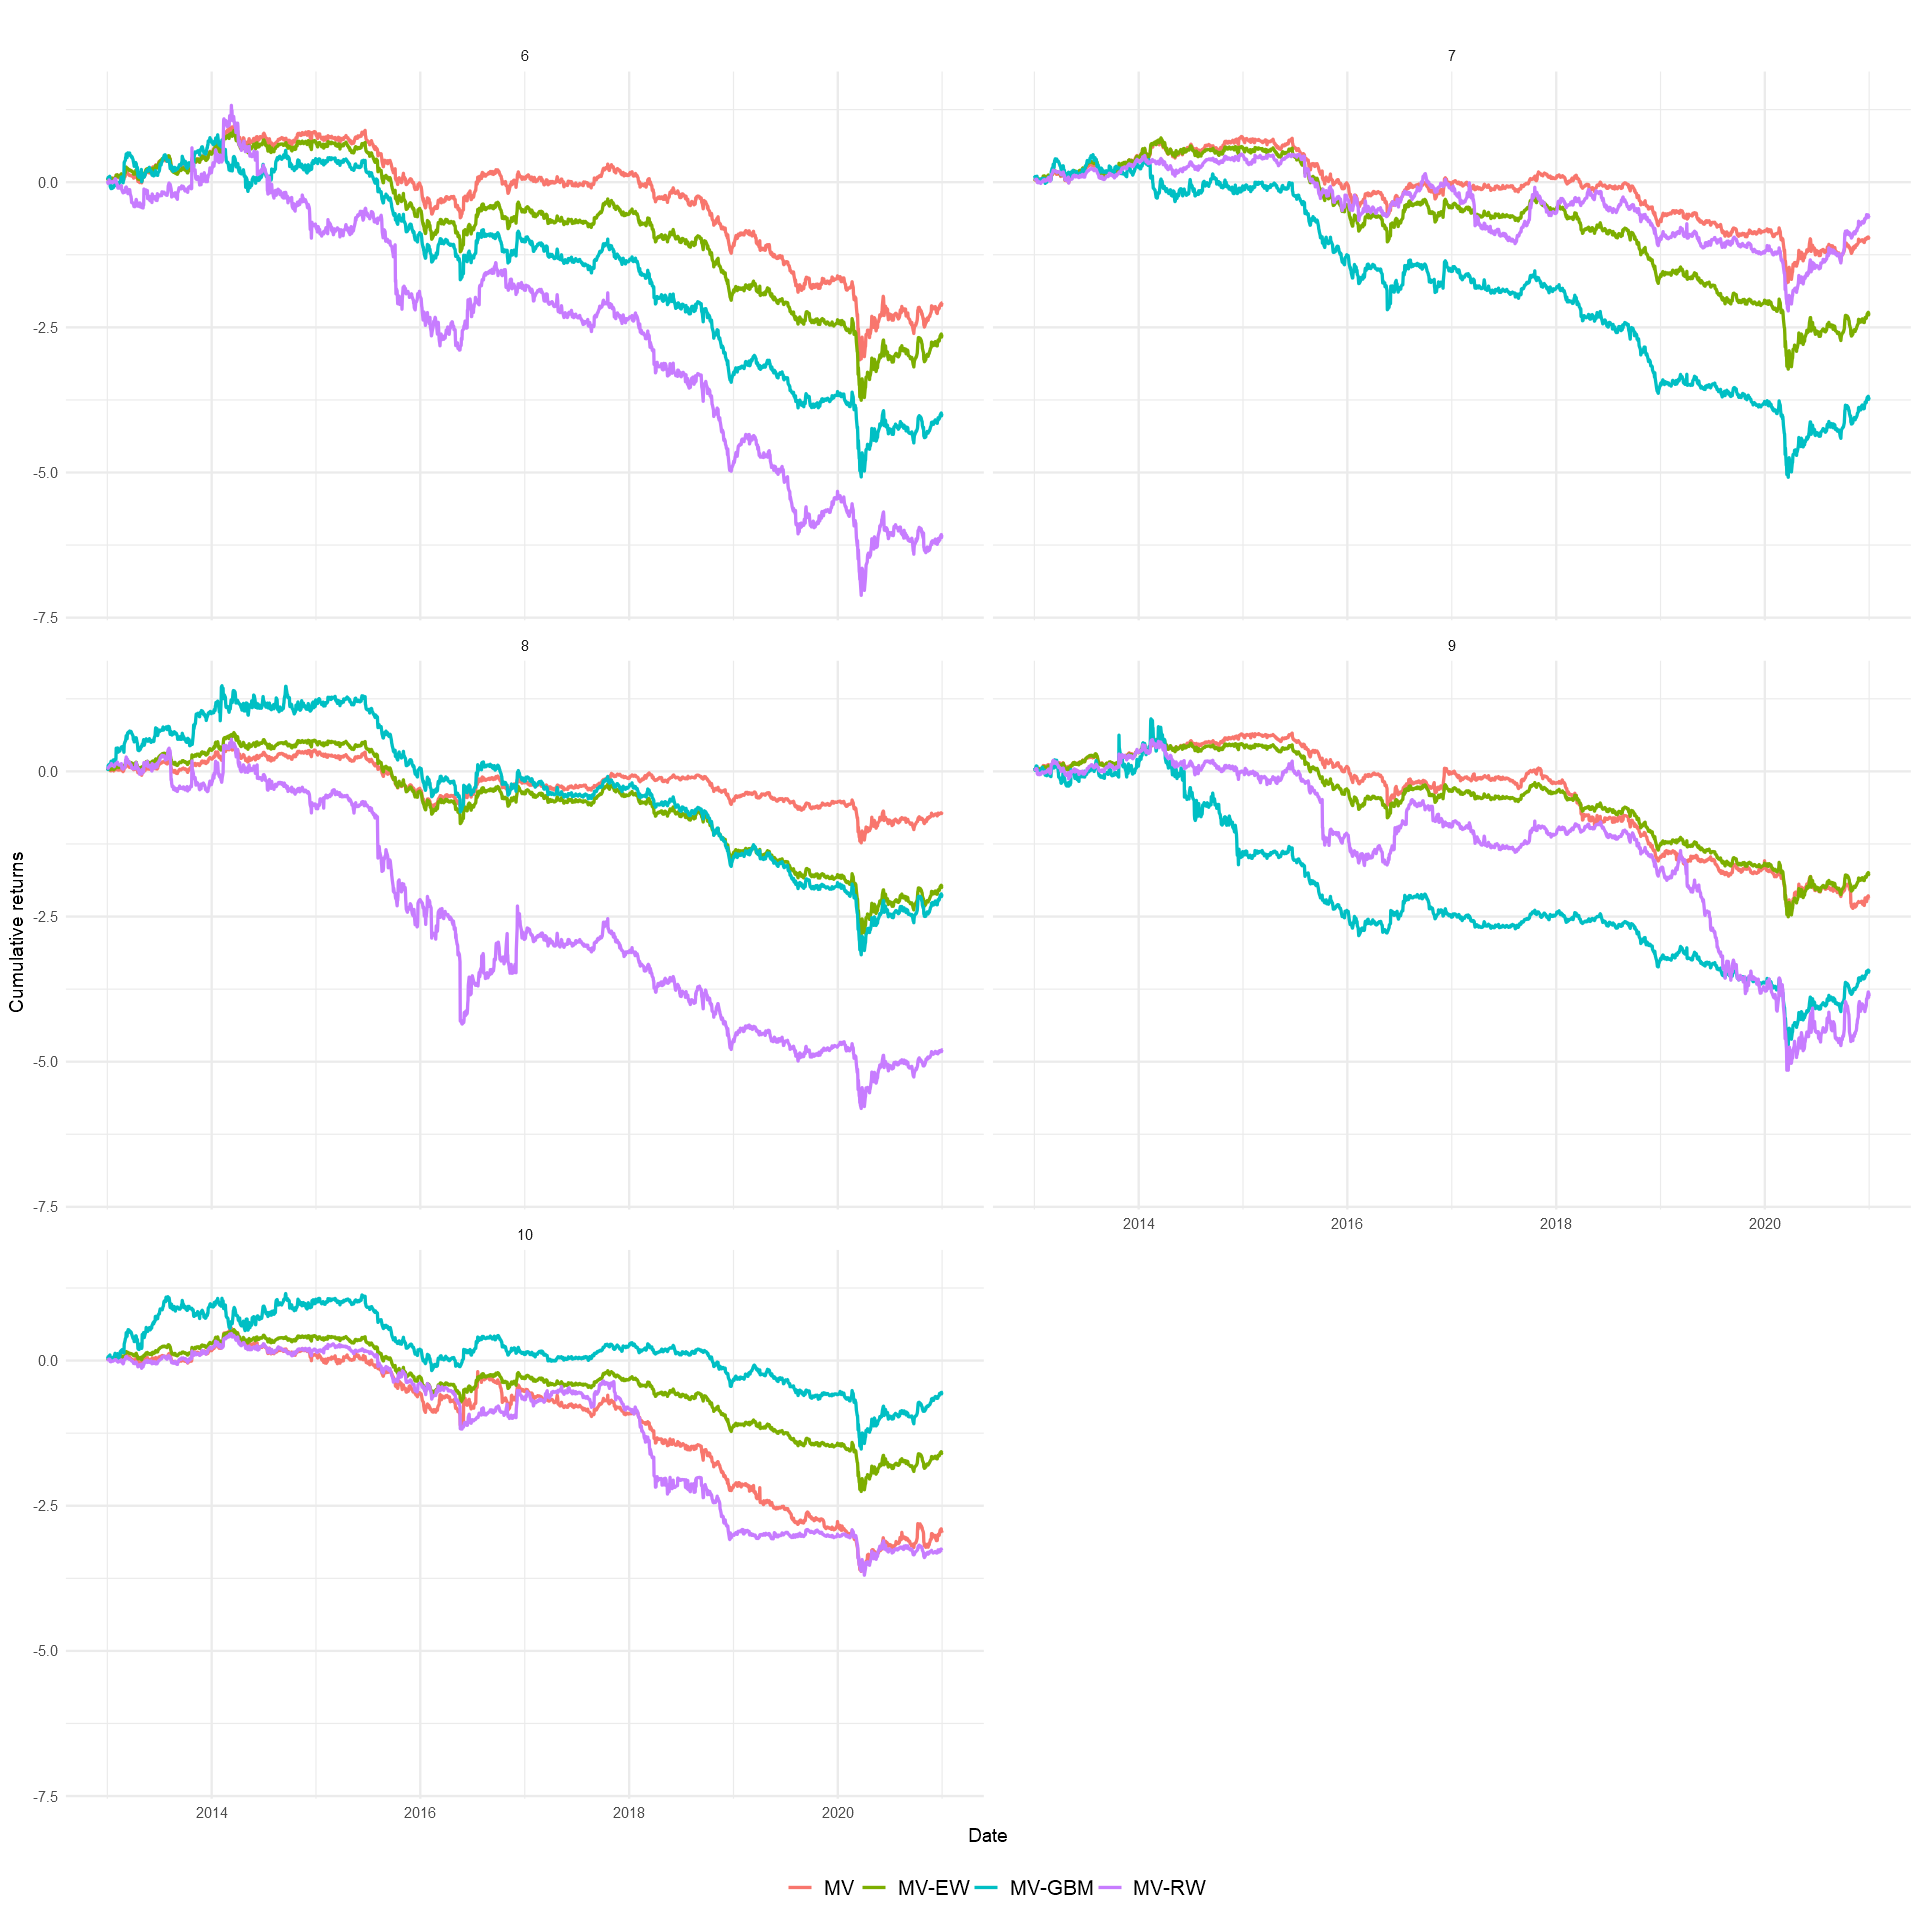

In [289]:
# NASDAQ index
p3 <- ggplot(base.cum.ret%>%filter(base == 'nasdaq', date <= '2021-01-01') , aes(x=date,y=cumulative.return,col=Modelo) )+
  geom_line(size=0.7) +
  theme_minimal() +
  theme(legend.position="bottom",
        legend.title = element_blank(),
        legend.text = element_text(colour="black", size=12)) +
  labs(title="",x='Date',y='Cumulative returns') +
  facet_wrap(vars(top), ncol=2) 
p3